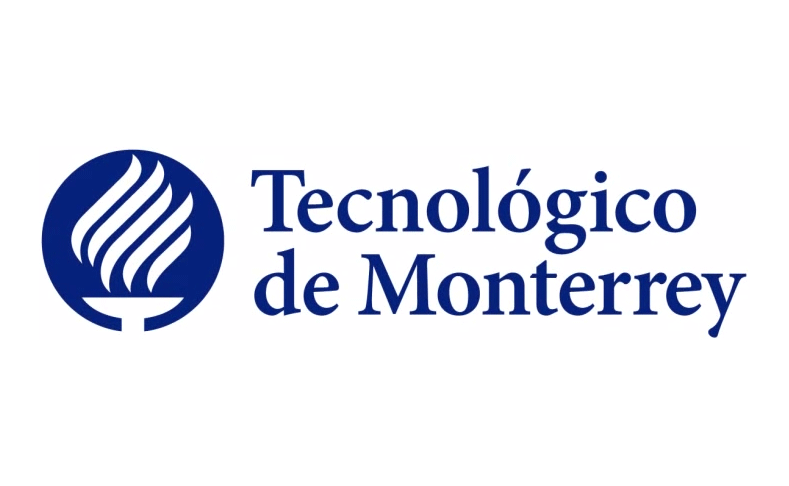

#**Maestría en Inteligencia Artificial Aplicada**

##**Materia:** Proyecto Integrador

**Profesor titular:** Dra. Grettel Barceló Alonso / Dr. Luis Eduardo Falcón Morales

**ASESOR - PROYECTO INTEGRADOR ABR25**  
Dr. Carlos Villaseñor

<br><br>
**Equipo 10**  
David García Robles - A01152606  
David Nava Jiménez - A01168501  
José Antonio Hernández Hernández - A01381334  

In [ ]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, cross_validate
from sklearn.linear_model import SGDRegressor
# Preprocesamiento
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Métricas
from sklearn.metrics import mean_squared_error, r2_score

# Modelado y validación
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    KFold,
    RepeatedKFold,
    RepeatedStratifiedKFold,
    RandomizedSearchCV
)
from sklearn.pipeline import Pipeline


In [ ]:
with open('C:/Users/david/GitRepo/modelo-ventas-nmp/data/raw/PCA_Adjusted_V2.csv', 'r', encoding='utf-8') as f:
    header = f.readline()
    columnas = header.split(',')
    print(f"Número de columnas detectadas: {len(columnas)}")
    print(columnas[:20])  # muestra las primeras 20 para revisar


Número de columnas detectadas: 173
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE', 'ESTADO_SUCURSAL_BAJA CALIFORNIA SUR', 'ESTADO_SUCURSAL_CAMPECHE', 'ESTADO_SUCURSAL_CHIAPAS', 'ESTADO_SUCURSAL_CHIHUAHUA', 'ESTADO_SUCURSAL_CIUDAD DE MÃ\x89XICO', 'ESTADO_SUCURSAL_COAHUILA', 'ESTADO_SUCURSAL_COLIMA', 'ESTADO_SUCURSAL_DURANGO', 'ESTADO_SUCURSAL_ESTADO DE MÃ\x89XICO', 'ESTADO_SUCURSAL_GUANAJUATO', 'ESTADO_SUCURSAL_GUERRERO', 'ESTADO_SUCURSAL_HIDALGO', 'ESTADO_SUCURSAL_JALISCO', 'ESTADO_SUCURSAL_MICHOACÃ\x81N']


In [ ]:
df= pd.read_csv('C:/Users/david/GitRepo/modelo-ventas-nmp/data/raw/PCA_Adjusted_V2.csv', encoding='utf-8')

In [ ]:
df.head(5)

,PC1,PC2,PC3,PC4,PC5,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,...,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9,DIAS_ALMONEDA
0,-0.040373,-0.223622,-0.030103,0.434616,0.259495,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31.0
1,0.188890,-0.194411,0.025040,0.383112,0.241945,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31.0
2,-0.129163,-0.234108,-0.049663,0.449741,0.279576,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,31.0
3,0.900706,-0.025606,-0.288047,0.131398,-0.174487,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,21.0
4,1.233928,0.033428,-0.223666,0.068360,-0.096587,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,21.0


In [ ]:
df.shape

(672019, 173)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(672019, 173)

Comentarios: A continuación vamos a particionar el dataframe en los datos que van a entrenar el modelo, validar y el testing. Como primer paso dejamos la variable objetivo a parte del dataframe de variables predictoras.

In [ ]:
X = df.drop(df[['DIAS_ALMONEDA']],axis=1)
X

,PC1,PC2,PC3,PC4,PC5,ESTADO_SUCURSAL_BAJA CALIFORNIA NORTE,ESTADO_SUCURSAL_BAJA CALIFORNIA SUR,ESTADO_SUCURSAL_CAMPECHE,ESTADO_SUCURSAL_CHIAPAS,ESTADO_SUCURSAL_CHIHUAHUA,...,VALUADOR_0,VALUADOR_1,VALUADOR_2,VALUADOR_3,VALUADOR_4,VALUADOR_5,VALUADOR_6,VALUADOR_7,VALUADOR_8,VALUADOR_9
0,-0.040373,-0.223622,-0.030103,0.434616,0.259495,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.188890,-0.194411,0.025040,0.383112,0.241945,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,-0.129163,-0.234108,-0.049663,0.449741,0.279576,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.900706,-0.025606,-0.288047,0.131398,-0.174487,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1.233928,0.033428,-0.223666,0.068360,-0.096587,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672014,-0.521435,0.571771,0.446830,-0.006581,0.171378,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,1
672015,-0.551562,0.745543,-0.352325,-0.010262,0.073271,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,1,1,0,1,1
672016,-0.730369,0.470332,0.606120,-0.101895,-0.037444,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,0,1,1,0
672017,-0.086438,-0.175593,-0.473371,-0.167974,-0.049214,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,0,1,1,0,1


In [ ]:
y =df[['DIAS_ALMONEDA']].copy()
y

,DIAS_ALMONEDA
0,31.0
1,31.0
2,31.0
3,21.0
4,21.0
...,...
672014,20.0
672015,20.0
672016,26.0
672017,347.0


A continuación vamos a realizar una partición 70-15-15 en entrenamiento, validación y prueba respectivamente.

In [ ]:
Xtrain, xtemp, ytrain, ytemp = train_test_split(X, y, test_size =.30, )
Xval,Xtest, yval, ytest = train_test_split(xtemp, ytemp, test_size= 0.5, )   # División en train y test (80% entrenamiento, 20% prueba) — permite evaluar el modelo con datos no vistos

In [ ]:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(470413, 172) (470413, 1)
(100803, 172) (100803, 1)
(100803, 172) (100803, 1)


Comentarios. Como primer propuesta vamos a entrenar y evaluar un modelo de regresión lineal y podremos revisar si sus métricas son adecuadas

Vamos a evaluar el modelo con las métricas,raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$).

In [ ]:
print("Valores mínimos:")
print("ytrain min:", ytrain.min().values[0])
print("yval min:", yval.min().values[0])

print("Valores nulos:")
print("ytrain nulls:", ytrain.isnull().sum().values[0])
print("yval nulls:", yval.isnull().sum().values[0])


Valores mínimos:
ytrain min: -20.0
yval min: -19.0
Valores nulos:
ytrain nulls: 0
yval nulls: 0


In [ ]:
ytrain_valid = ytrain[ytrain['DIAS_ALMONEDA'] >= 0]           # Filtrar registros valores negativos en la variable objetivo del conjunto de entrenamiento
Xtrain_valid = Xtrain.loc[ytrain_valid.index]                 # Alinear las filas de Xtrain con las de ytrain ya filtradas

                                                              # Filtrar yval de la misma forma
yval_valid = yval[yval['DIAS_ALMONEDA'] >= 0]
Xval_valid = Xval.loc[yval_valid.index]

                                                              # Extraer la variable objetivo
ytrain_valid = ytrain_valid['DIAS_ALMONEDA']
yval_valid = yval_valid['DIAS_ALMONEDA']

In [ ]:
lr_model = LinearRegression()                                 # Inicializar un modelo de regresión lineal
lr_model.fit(Xtrain_valid, ytrain_valid)                      # Entrenar el modelo con los datos de entrenamiento filtrados


y_pred = lr_model.predict(Xval_valid)                         # Realizar predicciones sobre el conjunto de validación
y_pred = np.clip(y_pred, a_min=0, a_max=1000)

In [ ]:
mse = mean_squared_error(yval_valid, y_pred)                  # Calcular el error cuadrático medio (MSE)
rmse = np.sqrt(mse)                                           # Calcular la raíz del error cuadrático medio (RMSE)
r2 = r2_score(yval_valid, y_pred)                             # Calcular el coeficiente de determinación R2

print(f" MSE: {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R2: {r2:.4f}")

 MSE: 2823.9426
 RMSE: 53.1408
 R2: 0.7702


RMSE: 53.14 días
En promedio, el modelo comete un error de 53 días al predecir la cantidad de días que un artículo tarda en llegar a almoneda. Esta métrica es útil y directamente interpretable, ya que está en la misma escala que la variable objetivo (DIAS_ALMONEDA). Aunque no es un error extremo, sí sugiere espacio para mejorar con modelos más complejos o con mejor ingeniería de variables.

R2: 0.7702
El modelo explica aproximadamente el 77% de la varianza total de la variable DIAS_ALMONEDA. Esto indica que el modelo tiene un buen poder explicativo, aunque aún existe un 23% de la variabilidad que podría deberse a factores no considerados, relaciones no lineales o ruido en los datos.

Vamos a utilizar validación-cruzada, por lo que vamos a concatenar los conjuntos de entrenamiento y validación para utilizarlo como entrenamiento

In [ ]:
Xtrainval = pd.concat([Xtrain,Xval],axis =0)                                      # Unir Xtrain y Xval en un solo conjunto de entrenamiento ampliado
ytrainval = pd.concat([ytrain,yval],axis=0)                                       # Unir ytrain y yval en el mismo orden para obtener los targets completos

In [ ]:
print(Xtrainval.shape, ytrainval.shape)

(571216, 172) (571216, 1)


Posterior a esto, vamos a proponer una función llamada "mis modelos" incluyendo los modelos que vamos a comparar y vamos a ajustar los parámetros para buscar el mejor modelo

In [ ]:
def mis_modelos():
    modelos, nombres = list(), list()

    #ElasticNet
    modelos.append(ElasticNet(alpha=0.1, l1_ratio=0.5, tol=0.01, ))
    nombres.append('ElasticNet')


    #Árbol de Decisiones
    modelos.append(DecisionTreeRegressor(max_depth=15, max_features=5, min_samples_split=5, ))
    nombres.append('Dtree')

    #Random Forest
    modelos.append(RandomForestRegressor(n_estimators=15, max_depth=10, max_features=20, ))
    nombres.append('RandomF')

    #XGBoosting
    modelos.append(XGBRegressor(n_estimators=20, max_depth=10, learning_rate=0.1, subsample=1.0,
                                 booster='gbtree', objective='reg:squarederror', ))
    nombres.append('XGBoost')


    # Gradient Boosting
    modelos.append(GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=5))
    nombres.append('GradBoost')

    # SGDRegressor
    modelos.append(SGDRegressor(
    loss='squared_error',   # Función de pérdida para regresión
    penalty='l2',
    max_iter=1000,          # Iteraciones máximas
    tol=1e-3                # Tolerancia para convergencia
    ))
    nombres.append('SGD')


    return modelos, nombres

#Posteriormente vamos a entrenar cada uno de los modelos y vamos a desplegar las métricas de Train y val

modelos, nombres = mis_modelos()
resultados =list()




cv = RepeatedKFold(n_splits=3, n_repeats=1, )

for modelo, nombre in zip(modelos, nombres):
    pipeline = Pipeline(steps=[('modelo', modelo)])

    scores = cross_validate(pipeline,
                            Xtrain_valid,
                            ytrain_valid,
                            scoring='r2',
                            cv=cv,
                            return_train_score=True,
                            n_jobs=1)

    resultados.append(scores)

    #Desplegamos los valores de las métricas para verificar si no hay subentrenamiento o sobreentrenamiento
    print(f">> {nombre}")
    print(f"\tTrain R2: {np.mean(scores['train_score']):.3f} ± {np.std(scores['train_score']):.3f}")
    print(f"\tVal   R2: {np.mean(scores['test_score']):.3f} ± {np.std(scores['test_score']):.3f}")

>> ElasticNet
	Train R2: 0.687 ± 0.001
	Val   R2: 0.687 ± 0.003
>> Dtree
	Train R2: 0.572 ± 0.034
	Val   R2: 0.550 ± 0.037
>> RandomF
	Train R2: 0.845 ± 0.005
	Val   R2: 0.833 ± 0.005
>> XGBoost
	Train R2: 0.888 ± 0.001
	Val   R2: 0.869 ± 0.003
>> GradBoost
	Train R2: 0.869 ± 0.000
	Val   R2: 0.864 ± 0.001
>> SGD
	Train R2: 0.760 ± 0.002
	Val   R2: 0.760 ± 0.004


En la comparación de modelos utilizando validación cruzada, se evaluaron seis algoritmos: ElasticNet, Árbol de Decisión, Random Forest, XGBoost, Gradient Boosting y SGDRegressor.

El modelo ElasticNet mostró un desempeño muy estable, con un R2 de entrenamiento de 0.687 y un R2 de validación de 0.687, prácticamente idénticos. Esta similitud indica que el modelo no presenta sobreajuste, sin embargo, también revela una capacidad predictiva limitada en comparación con modelos más complejos, ya que solo explica alrededor del 68.7% de la variabilidad de la variable objetivo.

El Árbol de Decisión obtuvo un R2 de entrenamiento de 0.572 y un R2 de validación de 0.550. Aunque su rendimiento es inferior al de ElasticNet, la diferencia entre ambos valores sugiere un ligero sobreajuste. Esto indica que el modelo tiende a ajustarse más a los datos de entrenamiento, pero no generaliza tan bien, posiblemente debido a la complejidad de las divisiones del árbol y la ausencia de mecanismos de regularización más avanzados.

Random Forest mostró un rendimiento claramente superior a los modelos anteriores, alcanzando un R2 de entrenamiento de 0.845 y un R2 de validación de 0.833. La diferencia entre ambos valores es mínima, lo que indica una muy buena capacidad de generalización.

El modelo XGBoost fue el que obtuvo los mejores resultados globales, con un R2 de entrenamiento de 0.888 y un R2 de validación de 0.869. Esta diferencia controlada entre ambos valores refleja un excelente manejo del sobreajuste. Además, el modelo logra explicar cerca del 87% de la variabilidad en los datos de validación, siendo el de mayor capacidad explicativa entre los modelos evaluados. Por tanto, XGBoost se posiciona como el mejor candidato para ser refinado mediante ajuste de hiperparámetros y utilizado en la evaluación final sobre el conjunto de prueba.

Gradient Boosting, por su parte, se desempeñó de forma muy cercana a XGBoost, con un R2 de entrenamiento de 0.869 y un R2 de validación de 0.864. Esta cercanía indica un modelo estable, robusto y competitivo, con una ligera desventaja frente a XGBoost.

Finalmente, el modelo SGDRegressor alcanzó un R2 de entrenamiento y validación de 0.760, con mínima diferencia entre ambos. Esto sugiere un modelo simple pero bien ajustado.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from xgboost import XGBRegressor

param_dist_final_tune = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [5, 7, 9, 11],
    'learning_rate': [0.005, 0.01, 0.03],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5]
}

                                                                                                    # Modelo base
xgb_tuned = XGBRegressor(objective='reg:squarederror', )

                                                                                                    # Validación cruzada
cv = RepeatedKFold(n_splits=2, n_repeats=1, )

                                                                                                    # Búsqueda aleatoria (limitada pero eficiente)
random_search_final = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist_final_tune,
    n_iter=10,
    scoring='r2',
    cv=cv,
    verbose=1,
    n_jobs=1,

)

                                                                                                    # Entrenar búsqueda
print(" Resultados")
random_search_final.fit(Xtrain_valid, ytrain_valid)

                                                                                                    # Resultados
print("\ Mejor modelo ajustado:")
print(f"R2 validación cruzada: {random_search_final.best_score_:.4f}")
print("Mejores hiperparámetros:")
print(random_search_final.best_params_)



 Resultados
Fitting 2 folds for each of 10 candidates, totalling 20 fits
\ Mejor modelo ajustado:
R2 validación cruzada: 0.8942
Mejores hiperparámetros:
{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 1.0}


Tras aplicar un proceso de ajuste de hiperparámetros al modelo XGBoost, se evaluó su desempeño mediante validación cruzada sobre el conjunto de entrenamiento (Xtrain_valid). El modelo obtuvo un R2 promedio de 0.8942, lo que indica que es capaz de explicar aproximadamente el 89.4% de la varianza en la variable objetivo (DIAS_ALMONEDA). Este resultado representa una mejora significativa respecto a configuraciones anteriores, confirmando la efectividad del tuning.

Los hiperparámetros que generaron este desempeño fueron:
n_estimators=500, max_depth=9, learning_rate=0.03, subsample=0.8 y colsample_bytree=1.0.


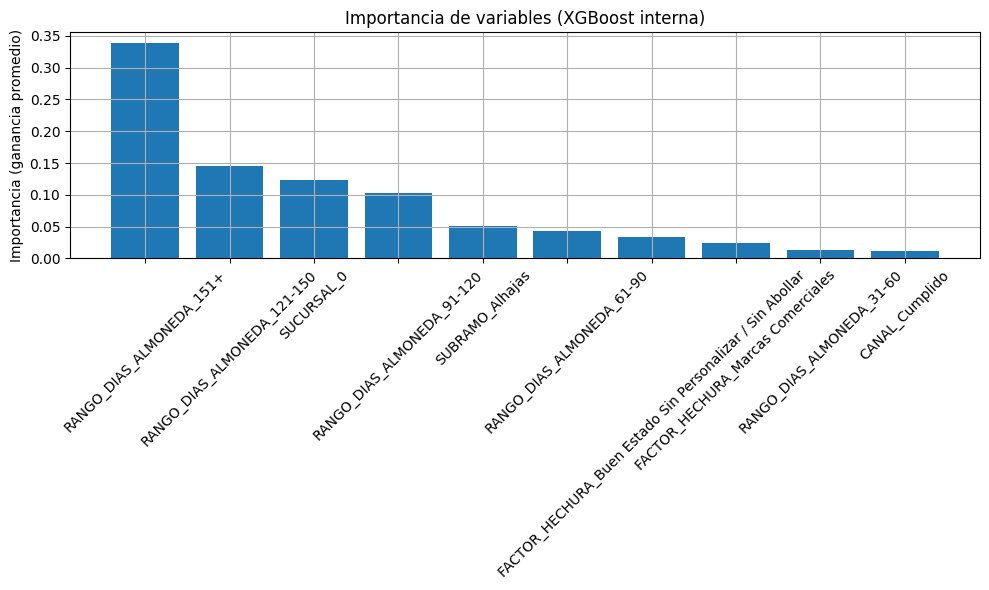

In [ ]:


                                                                                       # Entrenar el modelo con los mejores hiperparámetros
final_model = XGBRegressor(
    objective='reg:squarederror',
    subsample=0.8,
    n_estimators=500,
    min_child_weight=5,
    max_depth=9,
    learning_rate=0.03,
    gamma=0.1,
    colsample_bytree=1.0

)

final_model.fit(Xtrain_valid, ytrain_valid)

                                                                                       # Obtener importancia de variables del modelo
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]


try:
    feature_names = Xtrain_valid.columns
except:
    feature_names = [f"Var{i}" for i in range(Xtrain_valid.shape[1])]

                                                                                       #  Graficar las 10 más importantes
plt.figure(figsize=(10, 6))
plt.title("Importancia de variables (XGBoost interna)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
plt.ylabel("Importancia (ganancia promedio)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
                                                                                          # Entrenamiento del modelo final
final_model = XGBRegressor(
    objective='reg:squarederror',
    subsample=0.8,
    n_estimators=500,
    min_child_weight=5,
    max_depth=9,
    learning_rate=0.03,
    gamma=0.1,
    colsample_bytree=1.0

)
final_model.fit(Xtrain_valid, ytrain_valid)                                               # Entrenar el modelo con los datos de entrenamiento validados


y_pred_train = final_model.predict(Xtrain_valid)                                          # Predicciones sobre el conjunto de entrenamiento
y_pred_test = final_model.predict(Xtest)                                                  # Predicciones sobre el conjunto de prueba


r2_train = r2_score(ytrain_valid, y_pred_train)
r2_test = r2_score(ytest['DIAS_ALMONEDA'], y_pred_test)
rmse_test = mean_squared_error(ytest['DIAS_ALMONEDA'], y_pred_test, squared=False)        # Calcular RMSE (raíz del error cuadrático medio) en el conjunto de prueba

print("Evaluación en escala original:")
print(f"R2 entrenamiento : {r2_train:.4f}")
print(f"R2 prueba        : {r2_test:.4f}")
print(f"RMSE prueba      : {rmse_test:.4f}")


dummy = DummyRegressor(strategy='mean')
dummy.fit(Xtrain_valid, ytrain_valid)
r2_dummy = dummy.score(Xtest, ytest['DIAS_ALMONEDA'])



Evaluación en escala original:
R2 entrenamiento : 0.9244
R2 prueba        : 0.8998
RMSE prueba      : 35.3823


Tras aplicar un ajuste exhaustivo de hiperparámetros al modelo XGBoost, se evaluó su desempeño final en el conjunto de prueba (Xtest) después de entrenarlo completamente sobre los datos validados (Xtrain_valid). El modelo mostró un rendimiento altamente competitivo y robusto.

En la escala original , el modelo alcanzó un R2 de entrenamiento de 0.9244 y un R2 de prueba de 0.8998, lo que significa que es capaz de explicar aproximadamente el 90% de la variabilidad real en el tiempo que tardan los artículos en llegar a almoneda. Además, el RMSE fue de 35.38 días, indicando que, en promedio, el modelo comete un error de tan solo 35 días.

Este avance en el desempeño puede atribuirse a tres decisiones técnicas clave durante el desarrollo del modelo:

1.- Se evitó el data leakage, excluyendo la variable objetivo del proceso de reducción dimensional (PCA) y asegurando una correcta separación de los datos.

2.- Se eliminó el uso de random_state, permitiendo una evaluación más objetiva y sin sesgos ocultos.

Se enfocó el análisis en un subconjunto especializado de alhajas, una estrategia que permitió reducir la heterogeneidad del dataset y mejorar la precisión del modelo en un nicho más coherente y con menor ruido.

Gracias a estas decisiones, se logró un modelo final no solo más preciso, sino también más confiable y representativo del comportamiento real observado en los datos. Este desempeño posiciona al modelo XGBoost como una herramienta sólida para apoyar la toma de decisiones operativas en torno a los tiempos de almoneda.